In [21]:
import matplotlib.pyplot as plt
from pymatgen.io.vasp.outputs import Xdatcar
import matplotlib.patches as Patches
import numpy as np
import matplotlib.patheffects as PathEffects

In [3]:
data = Xdatcar('XDATCAR_cubic')

In [29]:
structures = data.structures

lat_param = structures[0].lattice.a
print(lat_param)
adj_lat_param = lat_param*(np.sqrt(2))
print(adj_lat_param)

21.098539
29.83784000005768


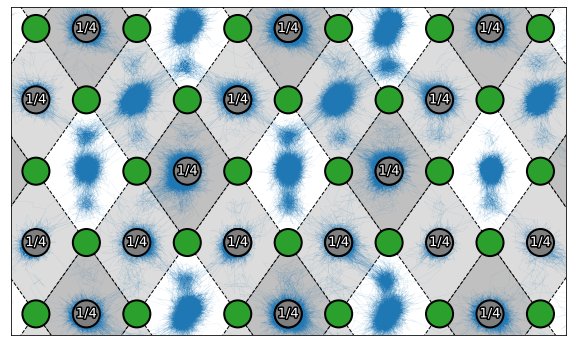

In [57]:
fig, ax = plt.subplots(figsize=(adj_lat_param/3, lat_param/3))

for i in range(0, len(structures[0])):
    x = []
    y = []
    z = []
    for s in structures:
        if s[i].species_string == 'Li':
            x.append(s[i].x)
            y.append(s[i].y)
            z.append(s[i].z)
    xy = []
    for x_i, y_i in zip(x, y):
        xy.append((x_i-y_i)*(np.sqrt(2)/2))
    ax.plot(xy, z, color='tab:blue', lw=0.05, zorder=0.5)
    
for i in range(0, len(structures[0])):
    if structures[0][i].species_string == 'Sc':
        x = s[i].x
        y = s[i].y
        z = s[i].z
        z_adj = (np.round((z/lat_param)*8)/8)*lat_param
        xy = (x-y)*(np.sqrt(2)/2)
        xy_adj = (np.round((xy/adj_lat_param)*16)/16)*adj_lat_param
        sc_ion = Patches.Circle((xy_adj, z_adj), radius=0.5, fc='tab:grey', ec='black', zorder=1, linewidth=2)
        ax.add_patch(sc_ion)
    
cl_x_1 = [(-7/16), (-5/16), (-3/16), (-1/16), (1/16), (3/16), (5/16), (7/16)]
cl_y_1 = [0, (1/4), (2/4), (3/4), 1]

cl_x_2 = [-8/16, (-6/16), (-4/16), (-2/16), (0/16), (2/16), (4/16), (6/16), 8/16]
cl_y_2 = [(1/8), (3/8), (5/8), (7/8)]

for clx in cl_x_1:
    for cly in cl_y_1:
        cl_ion = Patches.Circle((clx*adj_lat_param, cly*lat_param), radius=0.5, fc='tab:green', ec='black', zorder=1, linewidth=2)
        ax.add_patch(cl_ion)
        
for clx in cl_x_2:
    for cly in cl_y_2:
        cl_ion = Patches.Circle((clx*adj_lat_param, cly*lat_param), radius=0.5, fc='tab:green', ec='black', zorder=1, linewidth=2)
        ax.add_patch(cl_ion)

def add_polygon(x, y, color):
    # Creates rhombus based on left corner.
    p = Patches.Polygon([[adj_lat_param*x/16, lat_param*y/8], [adj_lat_param*(x+1)/16, lat_param*(y+1)/8], [adj_lat_param*(x+2)/16, lat_param*y/8], [adj_lat_param*(x+1)/16, lat_param*(y-1)/8]], closed=True, fc=color, ec='black', ls='--', zorder=0)
    ax.add_patch(p)    

# All 16d sites
x1 = [-7,-3,1,5]
x2 = [-9,-5,-1,3,7]
y1 = [0,4,8]
y2 = [2,6]

for x in x1:
    for y in y1:
        add_polygon(x, y, 'silver')
    
for x in x2:
    for y in y2:
        add_polygon(x, y, 'silver')

# 16d/16c sites
x3 = [-8,-6,-4,-2,0,2,4,6]
y3 =[1,3,5, 7]

for x in x3:
    for y in y3:
        add_polygon(x, y, 'gainsboro')

#Sc labels
x4 = [-5, -5, -4, -4, -3, -2, -1, -1, 0, 0, 1, 2, 3, 3, 4, 4, 5]
y4 = [5, 3, 6, 2, 3, 4, 5, 3, 6, 2, 3, 4, 5, 3, 6, 2, 3]

for x, y in zip(x4, y4):
    depth = ax.text(adj_lat_param*x/16, lat_param*y/8, '1/4', ha='center', va='center', color='white', size=13)
    depth.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='black')]) 
    
#plt.plot([0, adj_lat_param], [0.5*lat_param, 0.5*lat_param], color='black', lw=0.5)
#plt.plot([0, 0], [0, lat_param], color='black', lw=0.5)

ax.set_aspect('equal')
ax.set(xlim=(-5.5/16*adj_lat_param, 5.5/16*adj_lat_param), ylim=(1.7/8*lat_param, 6.3/8*lat_param))

ax.set_xticks([])
ax.set_yticks([])

plt.savefig('cubic_pic.png', bbox_inches='tight', dpi=500)

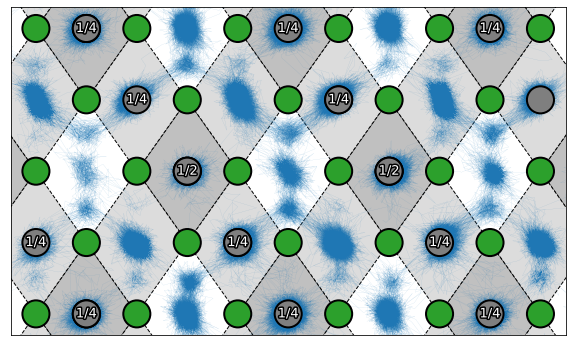

In [60]:
fig, ax = plt.subplots(figsize=(adj_lat_param/3, lat_param/3))

for i in range(0, len(structures[0])):
    x = []
    y = []
    z = []
    for s in structures:
        if s[i].species_string == 'Li':
            x.append(s[i].x)
            y.append(s[i].y)
            z.append(s[i].z)
    yz = []
    for y_i, z_i in zip(y, z):
        yz.append((y_i-z_i)*(np.sqrt(2)/2))
    ax.plot(yz, x, color='tab:blue', lw=0.05, zorder=0.5)
    
for i in range(0, len(structures[0])):
    if structures[0][i].species_string == 'Sc':
        x = s[i].x
        y = s[i].y
        z = s[i].z
        x_adj = (np.round((x/lat_param)*8)/8)*lat_param
        yz = (y-z)*(np.sqrt(2)/2)
        yz_adj = (np.round((yz/adj_lat_param)*16)/16)*adj_lat_param
        sc_ion = Patches.Circle((yz_adj, x_adj), radius=0.5, fc='tab:grey', ec='black', zorder=1, linewidth=2)
        ax.add_patch(sc_ion)
    
cl_x_1 = [(-7/16), (-5/16), (-3/16), (-1/16), (1/16), (3/16), (5/16), (7/16)]
cl_y_1 = [0, (1/4), (2/4), (3/4), 1]

cl_x_2 = [-8/16, (-6/16), (-4/16), (-2/16), (0/16), (2/16), (4/16), (6/16), 8/16]
cl_y_2 = [(1/8), (3/8), (5/8), (7/8)]

for clx in cl_x_1:
    for cly in cl_y_1:
        cl_ion = Patches.Circle((clx*adj_lat_param, cly*lat_param), radius=0.5, fc='tab:green', ec='black', zorder=1, linewidth=2)
        ax.add_patch(cl_ion)
        
for clx in cl_x_2:
    for cly in cl_y_2:
        cl_ion = Patches.Circle((clx*adj_lat_param, cly*lat_param), radius=0.5, fc='tab:green', ec='black', zorder=1, linewidth=2)
        ax.add_patch(cl_ion)

def add_polygon(x, y, color):
    # Creates rhombus based on left corner.
    p = Patches.Polygon([[adj_lat_param*x/16, lat_param*y/8], [adj_lat_param*(x+1)/16, lat_param*(y+1)/8], [adj_lat_param*(x+2)/16, lat_param*y/8], [adj_lat_param*(x+1)/16, lat_param*(y-1)/8]], closed=True, fc=color, ec='black', ls='--', zorder=0)
    ax.add_patch(p)    

# All 16d sites
x1 = [-7,-3,1,5]
x2 = [-9,-5,-1,3,7]
y1 = [0,4,8]
y2 = [2,6]

for x in x1:
    for y in y1:
        add_polygon(x, y, 'silver')
    
for x in x2:
    for y in y2:
        add_polygon(x, y, 'silver')

# 16d/16c sites
x3 = [-8,-6,-4,-2,0,2,4,6]
y3 =[1,3,5, 7]

for x in x3:
    for y in y3:
        add_polygon(x, y, 'gainsboro')

#Add missing Sc
x4 = [-4, -4, 4, 4]
y4 = [2, 6, 2, 6]

for x, y in zip(x4, y4):
    sc_ion = Patches.Circle((adj_lat_param*x/16, lat_param*y/8), radius=0.5, fc='tab:grey', ec='black', zorder=1, linewidth=2)
    ax.add_patch(sc_ion)        
        
#plt.plot([0, adj_lat_param], [0.5*lat_param, 0.5*lat_param], color='black', lw=0.5)
#plt.plot([0, 0], [0, lat_param], color='black', lw=0.5)

#Add Sc labels
x5 = [-5, -4, -4, -3, -2, -1, 0, 0, 1, 2, 3, 4, 4, 5]
y5 = [3, 2, 6, 5, 4, 3, 6, 2, 5, 4, 3, 6, 2, 5]
d5 = ['1/4', '1/4', '1/4', '1/4', '1/2', '1/4', '1/4', '1/4', '1/4', '1/2', '1/4', '1/4', '1/4']

for x, y, d in zip(x5, y5, d5):
    depth = ax.text(adj_lat_param*x/16, lat_param*y/8, d, ha='center', va='center', color='white', size=13)
    depth.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='black')]) 

ax.set_aspect('equal')
ax.set(xlim=(-5.5/16*adj_lat_param, 5.5/16*adj_lat_param), ylim=(1.7/8*lat_param, 6.3/8*lat_param))

ax.set_xticks([])
ax.set_yticks([])

plt.savefig('cubic_layered_pic.png', dpi=500)

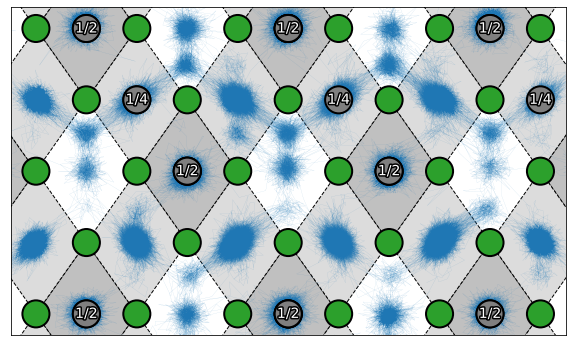

In [64]:
fig, ax = plt.subplots(figsize=(adj_lat_param/3, lat_param/3))

for i in range(0, len(structures[0])):
    x = []
    y = []
    z = []
    for s in structures:
        if s[i].species_string == 'Li':
            x.append(s[i].x)
            y.append(s[i].y)
            z.append(s[i].z)
    xz = []
    for x_i, z_i in zip(x, z):
        xz.append((x_i-z_i)*(np.sqrt(2)/2))
    ax.plot(xz, y, color='tab:blue', lw=0.05, zorder=0.5)
    
for i in range(0, len(structures[0])):
    if structures[0][i].species_string == 'Sc':
        x = s[i].x
        y = s[i].y
        z = s[i].z
        y_adj = (np.round((y/lat_param)*8)/8)*lat_param
        xz = (x-z)*(np.sqrt(2)/2)
        xz_adj = (np.round((xz/adj_lat_param)*16)/16)*adj_lat_param
        sc_ion = Patches.Circle((xz_adj, y_adj), radius=0.5, fc='tab:grey', ec='black', zorder=1, linewidth=2)
        ax.add_patch(sc_ion)
    
cl_x_1 = [(-7/16), (-5/16), (-3/16), (-1/16), (1/16), (3/16), (5/16), (7/16)]
cl_y_1 = [0, (1/4), (2/4), (3/4), 1]

cl_x_2 = [-8/16, (-6/16), (-4/16), (-2/16), (0/16), (2/16), (4/16), (6/16), 8/16]
cl_y_2 = [(1/8), (3/8), (5/8), (7/8)]

for clx in cl_x_1:
    for cly in cl_y_1:
        cl_ion = Patches.Circle((clx*adj_lat_param, cly*lat_param), radius=0.5, fc='tab:green', ec='black', zorder=1, linewidth=2)
        ax.add_patch(cl_ion)
        
for clx in cl_x_2:
    for cly in cl_y_2:
        cl_ion = Patches.Circle((clx*adj_lat_param, cly*lat_param), radius=0.5, fc='tab:green', ec='black', zorder=1, linewidth=2)
        ax.add_patch(cl_ion)

def add_polygon(x, y, color):
    # Creates rhombus based on left corner.
    p = Patches.Polygon([[adj_lat_param*x/16, lat_param*y/8], [adj_lat_param*(x+1)/16, lat_param*(y+1)/8], [adj_lat_param*(x+2)/16, lat_param*y/8], [adj_lat_param*(x+1)/16, lat_param*(y-1)/8]], closed=True, fc=color, ec='black', ls='--', zorder=0)
    ax.add_patch(p)    

# All 16d sites
x1 = [-7,-3,1,5]
x2 = [-9,-5,-1,3,7]
y1 = [0,4,8]
y2 = [2,6]

for x in x1:
    for y in y1:
        add_polygon(x, y, 'silver')
    
for x in x2:
    for y in y2:
        add_polygon(x, y, 'silver')

# 16d/16c sites
x3 = [-8,-6,-4,-2,0,2,4,6]
y3 =[1,3,5, 7]

for x in x3:
    for y in y3:
        add_polygon(x, y, 'gainsboro')

#Add missing Sc
x4 = [5]
y4 = [5]

for x, y in zip(x4, y4):
    sc_ion = Patches.Circle((adj_lat_param*x/16, lat_param*y/8), radius=0.5, fc='tab:grey', ec='black', zorder=1, linewidth=2)
    ax.add_patch(sc_ion)        
        
#plt.plot([0, adj_lat_param], [0.5*lat_param, 0.5*lat_param], color='black', lw=0.5)
#plt.plot([0, 0], [0, lat_param], color='black', lw=0.5)

#Add Sc labels
x5 = [-4, -4, -3, -2, 0, 0, 1, 2, 4, 4, 5]
y5 = [6, 2, 5, 4, 6, 2, 5, 4, 6, 2, 5]
d5 = ['1/2', '1/2', '1/4', '1/2', '1/2', '1/2', '1/4', '1/2', '1/2', '1/2', '1/4']

for x, y, d in zip(x5, y5, d5):
    depth = ax.text(adj_lat_param*x/16, lat_param*y/8, d, ha='center', va='center', color='white', size=14)
    depth.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='black')]) 

ax.set_aspect('equal')
ax.set(xlim=(-5.5/16*adj_lat_param, 5.5/16*adj_lat_param), ylim=(1.7/8*lat_param, 6.3/8*lat_param))

ax.set_xticks([])
ax.set_yticks([])

plt.savefig('cubic_pic_3.png', dpi=500)